In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
!unzip drive / MyDrive / data / simplecv_data.zip

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
# Local files
# img = image.load_img("../ml_learning/simplecv/train/Dog/4.jpg")

# Drive files
img = image.load_img("/content/train/Dog/4.jpg")

In [ ]:
plt.imshow(img)

In [ ]:
train = ImageDataGenerator(rescale=1 / 255)
test = ImageDataGenerator(rescale=1 / 255)

In [ ]:
train_dataset = train.flow_from_directory(
    # "../ml_learning/simplecv/train/",
    "../content/train/",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

In [ ]:
test_dataset = test.flow_from_directory(
    # "../ml_learning/simplecv/test/",
    "../content/test/",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

In [ ]:
test_dataset.class_indices

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D(2, 2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation='relu'))

model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import glob
from PIL import Image

imagepath = '../content/train/Cat'

imgs_names = glob.glob(imagepath + '\\*.jpg')

for imgname in imgs_names:
    img = Image.open(imgname)
    if img is None:
        print(imgname)

In [ ]:
model.fit(
    train_dataset,
    steps_per_epoch=100,
    epochs=5,
    validation_data=test_dataset,
)

In [ ]:
model.save('final_model.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('final_model.h5')

# Show the model architecture
new_model.summary()

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename, target_size=(150, 150))

    plt.imshow(img1)

    Y = image.img_to_array(img1)

    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:

        plt.xlabel("DOG", fontsize=30)


    elif val == 0:

        plt.xlabel("CAT", fontsize=30)

In [ ]:
predictImage("/content/train/Dog/2139.jpg")

In [51]:
model.save('final_model.h5')

In [53]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('final_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [54]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("DOG",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("CAT",fontsize=30)

[[1.]]


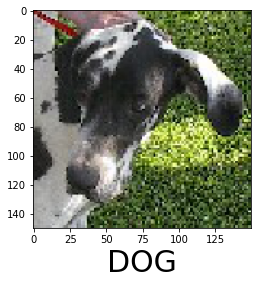

In [62]:
predictImage("/content/train/Dog/2139.jpg")